## 1. Importing Dataset Properly

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_test1=pd.read_csv("gender_submission.csv")

In [3]:
# Reading & understanding Training Dataset
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Reading & understanding Testing Dataset
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Cleaning Dataset

###  a) Finding missing values in any column : If % of NaN values in a column exceeeds 75%, delete that column

In [5]:
# Training Set
a=df_train.isnull().sum()/len(df_train.index)
b=a*100
c=round(b,2)
c

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [6]:
# Dropping column 'Cabin' as more than 75 percent values are NaN, so won't help in contributing
df_train=df_train.drop(['Cabin'] , axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
# Testing Set
a=df_test.isnull().sum()/len(df_test.index)
b=a*100
c=round(b,2)
c

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [8]:
# Dropping column 'Cabin' as more than 75 percent values are NaN, so won't help in contributing
df_test=df_test.drop(['Cabin'] , axis=1)
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### b) Imputing missing values of column Age in train & test sets & of column Fare in test set

In [11]:
df_train['Age'].mode()

0    24.0
dtype: float64

In [12]:
df_test['Age'].mode()

0    21.0
1    24.0
dtype: float64

In [13]:
df_train['Age'].fillna(24, inplace = True) 

In [14]:
df_test['Age'].fillna(21, inplace = True)

In [15]:
a=df_train.isnull().sum()/len(df_train.index)
b=a*100
c=round(b,2)
c

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [16]:
df_test['Fare'].mean()

35.6271884892086

In [17]:
df_test['Fare'].fillna(35.63, inplace = True)

In [18]:
a=df_test.isnull().sum()/len(df_test.index)
b=a*100
c=round(b,2)
c

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

### c) Converting Male & Female values to 1 & 0 

In [19]:
gender = {'male': 1,'female': 0} 

In [20]:
df_train.Sex = [gender[item] for item in df_train.Sex]
df_test.Sex  = [gender[item] for item in df_test.Sex]

In [21]:
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


### d) For Categorical Variable 'Embarked column' with multiple independent values, create dummy features

In [22]:
dummy_train=pd.get_dummies(df_train[['Embarked']], drop_first=True)
df_train=pd.concat([df_train, dummy_train],axis=1)

In [23]:
dummy_test= pd.get_dummies(df_test[['Embarked']], drop_first= True)
df_test=pd.concat([df_test, dummy_test], axis=1)

In [24]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1


In [25]:
# Dropping original column 'Embarked'
df_train=df_train.drop(['Embarked'], axis=1)
df_test =df_test.drop(['Embarked'], axis=1)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,1


### e) Logically thinking, column 'Name' would not be a key factor in determining who got survived, hence dropping it

In [26]:
df_train=df_train.drop(['Name'], axis=1)
df_test=df_test.drop(['Name'], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,0,1


### f) Creating additional Feature 'Close Family Members' from columns : SibSp & Parch

sibsp - no. of siblings / spouses aboard the Titanic

parch - no. of parents / children aboard the Titanic

If each of both values of a column are 0, then values of 'Close Family Members' will be 0 ; otherwise 1

In [27]:
df_train['Close Family Member']=""

In [28]:
for ind in df_train.index: 
    df_train['Close Family Member'][ind]= 0 if (df_train['SibSp'][ind]==0 and df_train['Parch'][ind]==0) else 1

C:\Users\Bhanu Wadhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df_test['Close Family Member']=""

In [30]:
for ind in df_test.index: 
    df_test['Close Family Member'][ind]= 0 if (df_test['SibSp'][ind]==0 and df_test['Parch'][ind]==0) else 1

C:\Users\Bhanu Wadhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### g) Splitting df_train into X_train & y_train (PassengerId column is dropped)
###    Splitting df_test into X_test             (Survived column is not present, so no y_test)

In [31]:
y_train=df_train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
X_train=df_train.drop(['PassengerId','Survived'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,22.0,1,0,A/5 21171,7.2500,0,1,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,1,0,35.0,1,0,113803,53.1000,0,1,1
4,3,1,35.0,0,0,373450,8.0500,0,1,0


In [33]:
X_test=df_test.drop(['PassengerId'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,34.5,0,0,330911,7.8292,1,0,0
1,3,0,47.0,1,0,363272,7.0000,0,1,1
2,2,1,62.0,0,0,240276,9.6875,1,0,0
3,3,1,27.0,0,0,315154,8.6625,0,1,0
4,3,0,22.0,1,1,3101298,12.2875,0,1,1


### h) Feature Scaling

In [34]:
# It helps in faster convergence of Gradient Descent
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_train[['Age','Fare']]=scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,-0.497793,1,0,A/5 21171,-0.502445,0,1,1
1,1,0,0.715048,1,0,PC 17599,0.786845,0,0,1
2,3,0,-0.194583,0,0,STON/O2. 3101282,-0.488854,0,1,0
3,1,0,0.487640,1,0,113803,0.420730,0,1,1
4,3,1,0.487640,0,0,373450,-0.486337,0,1,0


In [36]:
X_test[['Age','Fare']]=scaler.fit_transform(X_test[['Age','Fare']])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,0.466044,0,0,330911,-0.498407,1,0,0
1,3,0,1.415579,1,0,363272,-0.513274,0,1,1
2,2,1,2.555021,0,0,240276,-0.465089,1,0,0
3,3,1,-0.103676,0,0,315154,-0.483466,0,1,0
4,3,0,-0.483490,1,1,3101298,-0.418472,0,1,1


### i) Dropping Ticket column as it has prefix letters

In [37]:
X_train=X_train.drop(['Ticket'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,-0.497793,1,0,-0.502445,0,1,1
1,1,0,0.715048,1,0,0.786845,0,0,1
2,3,0,-0.194583,0,0,-0.488854,0,1,0
3,1,0,0.487640,1,0,0.420730,0,1,1
4,3,1,0.487640,0,0,-0.486337,0,1,0


In [38]:
X_test=X_test.drop(['Ticket'], axis=1)
X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,0.466044,0,0,-0.498407,1,0,0
1,3,0,1.415579,1,0,-0.513274,0,1,1
2,2,1,2.555021,0,0,-0.465089,1,0,0
3,3,1,-0.103676,0,0,-0.483466,0,1,0
4,3,0,-0.483490,1,1,-0.418472,0,1,1


## 3) Building Model

### Checking Co-relations

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

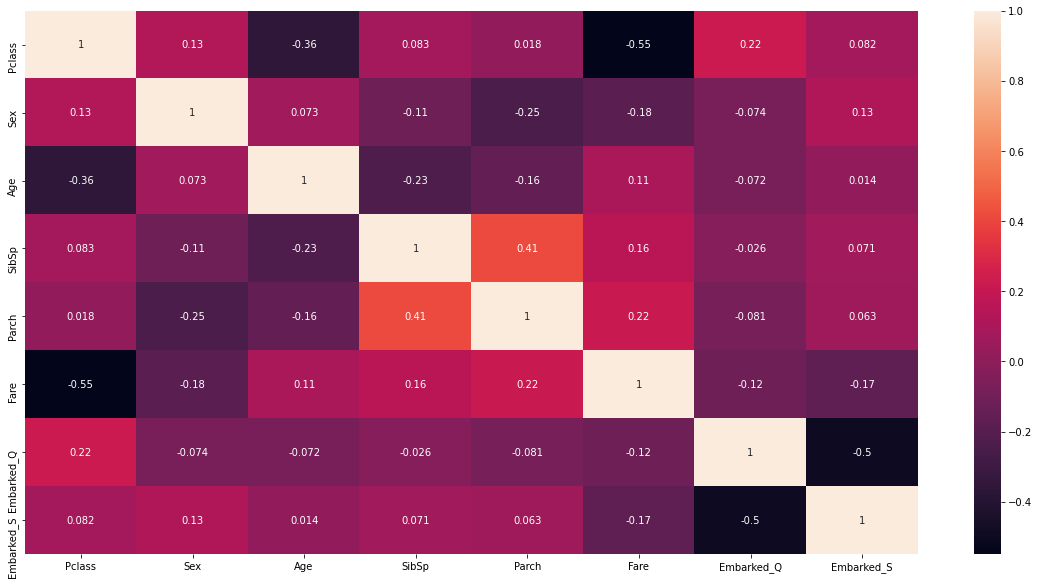

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show

In [41]:
# Highest co-relation is -0.55, so need not drop any column

In [42]:
###

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [44]:
LR.fit(X_train, y_train)

LogisticRegression()

# 4) Predict Model

In [45]:
# Predict churn on test data using the model just built
y_pred = LR.predict(X_test)

In [46]:
print(type(y_pred))
y_pred=pd.Series(y_pred)
print(type(y_pred))
y_pred.head()

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    1
dtype: int64

In [47]:
y_test=df_test1['Survived']
print(type(y_test))
y_test.head()

<class 'pandas.core.series.Series'>


0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

# 5) Test Model

In [48]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[248  18]
 [  8 144]]


In [50]:
y_pred

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [51]:
df = pd.DataFrame({'PassengerId': [ x for x in range(892, 1310)],
                   'Survived': y_pred,
                  })
# df.to_csv(index=False)

In [52]:
df.to_csv(r'I:\UpGrad\Kaggle\Titanic\Titanic_Result_v1.csv', index = False)

Kaggle score = 0.76076 when submitted as notebook